In [1]:
import pickle
import pandas as pd
import numpy as np

In [2]:
DATA_PATH = './data/cleaned/'
filename = 'concatenated_df_cleaned_glove.pkl'
with open(DATA_PATH + filename, 'rb') as f:
    df = pickle.load(f)

In [3]:
df.week_month_year.unique()
# use these as labels

array([ 5,  7,  9, 14, 15, 18, 20, 22])

In [4]:
df.head()

,created_at,user,id_str,retweeted_status,Hash words,link,entities,Topic Label,urls,no_link,...,month_year,week_month_year,user_id,cluster,is_retweet,hashtags,link_shorteners,article_text,article_text_cleaned,glove_avg
0,2020-01-31 23:08:33+00:00,"{'id': 19031057, 'id_str': '19031057', 'name':...",1223382589689356288,NaN,#coronavirus,https://twitter.com/user/status/12233825896893...,"{'hashtags': [{'text': 'coronavirus', 'indices...","(43, 0.999852366207409)",[https://www.kron4.com/news/national/when-will...,False,...,2020-01,5,19031057,43,False,[coronavirus],[False],"KRON4 by: Aubree Gordon, University of Michig...","[kron, aubree, gordon, university, michigan, c...","[0.14527764461177867, 1.301592749657575, 0.487..."
1,2020-01-31 23:11:29+00:00,"{'id': 798925214, 'id_str': '798925214', 'name...",1223383328843280384,{'created_at': 'Fri Jan 31 20:41:20 +0000 2020...,#coronavirus #vaccine:,https://twitter.com/user/status/12233833288432...,"{'hashtags': [{'text': 'Coronavirus', 'indices...","(6, 0.9883827140131066)",[https://www.cnbc.com/2020/01/31/coronavirus-w...,False,...,2020-01,5,798925214,6,True,"[Coronavirus, vaccine]",[False],U.S. and international health officials are s...,"[international, health, officials, speeding, w...","[0.4456857605208643, 1.4679776202002541, 0.697..."
2,2020-01-31 23:12:03+00:00,"{'id': 806144538049970176, 'id_str': '80614453...",1223383471999127552,NaN,No hashtags,https://twitter.com/user/status/12233834719991...,"{'hashtags': [], 'symbols': [], 'user_mentions...","(74, 0.9999928079220538)",[https://www.businessinsider.com/australia-suc...,False,...,2020-01,5,806144538049970176,74,False,[None],[False],A leading-edge research firm focused on digit...,"[leading_edge, research, firm_focused, active,...","[-0.012559317511040717, 0.5841067982127425, 0...."
3,2020-01-31 23:35:42+00:00,"{'id': 61298849, 'id_str': '61298849', 'name':...",1223389423045206016,{'created_at': 'Tue Jan 28 18:26:16 +0000 2020...,No hashtags,https://twitter.com/user/status/12233894230452...,"{'hashtags': [], 'symbols': [], 'user_mentions...","(36, 0.9999993854913211)",[https://www.greenmedinfo.com/blog/examining-r...,False,...,2020-01,5,61298849,36,True,[None],[False],Mr. Kennedy is in very safe territory by rep...,"[mr, kennedy, safe, territory, reporting, cdc,...","[1.2950098205753602, 3.404326125156658, 2.0269..."
4,2020-01-31 23:37:23+00:00,"{'id': 1152822375567654912, 'id_str': '1152822...",1223389844719599616,NaN,No hashtags,https://twitter.com/user/status/12233898447195...,"{'hashtags': [], 'symbols': [], 'user_mentions...","(74, 0.9999985797901156)",[https://www.dailymail.co.uk/news/article-7952...,False,...,2020-01,5,1152822375567654912,74,False,[None],[True],By Kylie Stevens and Stephen Gibbs and Nic Wh...,"[kylie, stevens, stephen, gibbs, nic, white, d...","[0.23033713073586115, 4.3884405878634425, 4.87..."


In [5]:
# make glove vectors into dataframe to use PCA
dims = []
for i in range(100):
    dims.append('dim_' + str(i))
    
# glove vectors as features
glove_vecs = df['glove_avg'].tolist()
features_df = pd.DataFrame([vec for vec in glove_vecs], columns=dims)

# pca feature creation
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features_df)
pca_features = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [6]:
# apply labels by time of year
label = df['week_month_year'].tolist()
pca_df = pd.concat([pca_features, df[['week_month_year']]], axis=1)
pca_df.head()

,principal component 1,principal component 2,week_month_year
0,-7.312902,-0.991691,5
1,-0.072427,-1.154718,5
2,-11.092075,-1.017181,5
3,27.251535,-0.227599,5
4,45.273417,-3.771544,5


In [7]:
# # create segments and labels
# dates = ['jan_31', 'feb_13', 'feb_29', 'apr_01', 'apr_10', 'may_01', 'may_15', 'may_31']
# length = [1182, 1367, 500, 532, 557, 1243, 1176, 897]
# range_start = [0, 1182, 2549, 3049, 3581, 4138, 5381, 6557]
# range_end = [1181, 2549, 3049, 3581, 4138, 5381, 6557, 7454]

# col_names = ['dates', 'length', 'range_start', 'range_end']

# segments_df = pd.DataFrame(zip(dates, length, range_start, range_end), columns = col_names)
# # segments_df.head()

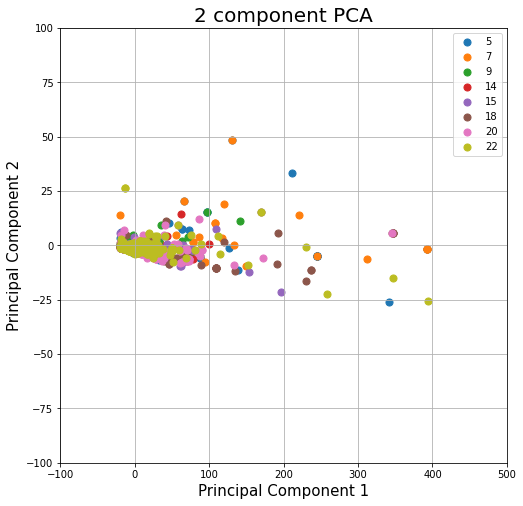

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


targets = pca_df['week_month_year'].unique().tolist()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan'] # 'tab:olive', 
for target, color in zip(targets,colors):
    indicesToKeep = pca_df['week_month_year'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'principal component 1'], 
               pca_df.loc[indicesToKeep, 'principal component 2'], 
               c = color, 
               s = 50)
    
    
plt.xlim(-100, 500)
plt.ylim(-100, 100)
    
ax.legend(targets)
ax.grid()

In [9]:
# # plot all embeddings

# import matplotlib.pyplot as plt

# plt.figure(figsize=(13,7))
# plt.scatter(pca_df['principal component 1'], 
#             pca_df['principal component 2'],
#             color='blue')

# plt.xlabel("PC1",size=15)
# plt.ylabel("PC2",size=15)
# plt.title("All Embeddings",size=20)


# # plot each date separately
# for i in range(len(segments_df)):

#     plt.figure(figsize=(13,7))
#     plt.scatter(pca_df.iloc[segments_df.iloc[i]['range_start']: segments_df.iloc[i]['range_end']]['principal component 1'], 
#                 pca_df.iloc[segments_df.iloc[i]['range_start']: segments_df.iloc[i]['range_end']]['principal component 2'],
#                 color='blue')

#     plt.xlabel("PC1",size=15)
#     plt.ylabel("PC2",size=15)
#     plt.title(segments_df.iloc[i]['dates'],size=20)
    
#     # limit axes to keep fixed view
#     # discards some outliers stretching out the plot axes
#     plt.xlim(-100, 500)
#     plt.ylim(-100, 500)
#     plt.show()


## look closer at outliers

In [10]:
# find outliers
pc1_outliers = []
for i in range(len(pca_df)):
    if pca_df.iloc[i]['principal component 1'] > 2000:
        pc1_outliers.append(i)

pc2_outliers = []
for j in range(len(pca_df)):
    if pca_df.iloc[j]['principal component 2'] > 1000:
        pc2_outliers.append(j)


all_outliers = pc1_outliers.copy()
all_outliers.extend(pc2_outliers)
print(all_outliers)


[78, 1892, 2233, 3010, 3176, 3331, 4195, 91, 141]


In [11]:
# drop outliers from features
print(features_df.shape)
features_no_outliers = features_df.drop(all_outliers)
print(features_no_outliers.shape)

#show the drop actually happened. should be missing 78
features_no_outliers.iloc[77:82]

(7454, 100)
(7445, 100)


,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_90,dim_91,dim_92,dim_93,dim_94,dim_95,dim_96,dim_97,dim_98,dim_99
77,-0.016214,0.336162,1.022499,-0.179004,-0.174727,0.085398,-0.085273,0.812682,-0.658650,0.028831,...,0.877315,-0.832536,0.149822,0.485518,-2.217749,1.883735,-0.298396,-1.135741,1.860950,-0.478395
79,-0.182316,0.055507,0.123260,-0.108629,0.065498,0.078140,-0.066127,-0.033377,0.137510,0.049135,...,-0.102639,0.159790,0.036620,-0.000390,0.005602,-0.014410,-0.020736,-0.196155,0.237977,-0.011111
80,0.023095,0.789787,0.626303,0.071333,0.241821,0.030513,-0.617990,-0.024066,-0.006489,0.074103,...,0.689494,-0.448660,0.033735,-0.012500,-1.587453,0.652110,-0.641715,-1.183069,1.700394,-0.087901
81,0.445686,1.467978,0.697063,-0.299715,-0.285041,-1.131935,0.229572,0.201510,-0.355472,-0.367729,...,1.231484,-0.480267,-0.147088,-0.260851,-1.856863,1.371188,-0.111282,-1.648536,2.360388,-0.147012
82,0.546664,1.790212,0.703193,-0.371633,-0.132327,-0.877409,0.226621,0.026922,-0.334252,-0.342214,...,1.222221,-0.775396,0.087007,-0.308298,-1.893341,1.288101,-0.268155,-1.681052,2.270027,-0.091869


In [12]:
# remove outliers from labels
print(df['week_month_year'].shape)
labels_no_outliers = df['week_month_year'].drop(all_outliers)
print(labels_no_outliers.shape)

labels_no_outliers.iloc[77:82]

(7454,)
(7445,)


77    5
79    5
80    5
81    5
82    5
Name: week_month_year, dtype: int64

In [13]:
# reset indices

labels_no_outliers.reset_index(drop=True, inplace=True)
features_no_outliers.reset_index(drop=True, inplace=True)


In [14]:
print(labels_no_outliers.shape)
print(features_no_outliers.shape)

(7445,)
(7445, 100)


In [15]:
# pca feature creation
from sklearn.decomposition import PCA
pca_no_outliers = PCA(n_components=2)
principalComponents_no_outliers = pca_no_outliers.fit_transform(features_no_outliers)
pca_features_no_outliers = pd.DataFrame(data = principalComponents_no_outliers, 
                                        columns = ['principal component 1', 'principal component 2'])
print(pca_features_no_outliers.shape)


(7445, 2)


In [16]:
# concatenate
pca_df_no_outliers = pd.concat([pca_features_no_outliers, labels_no_outliers], axis=1)
print()
print(len(pca_df_no_outliers))


7445


In [17]:
pca_df_no_outliers.head()

,principal component 1,principal component 2,week_month_year
0,-2.912967,-1.834059,5
1,4.791427,-0.645432,5
2,-6.686145,-0.604177,5
3,33.026640,-4.051824,5
4,51.790212,2.979700,5


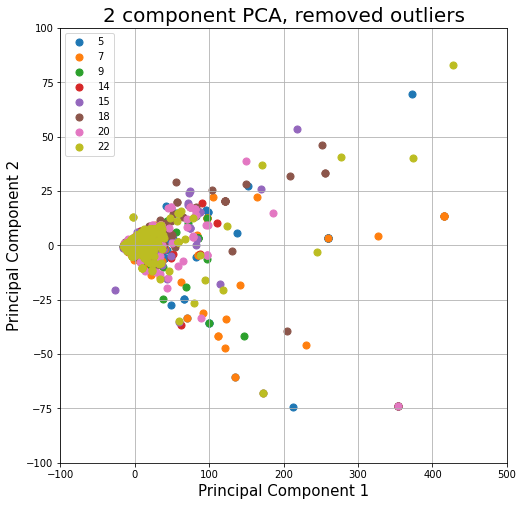

In [18]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA, removed outliers', fontsize = 20)


targets = pca_df_no_outliers['week_month_year'].unique().tolist()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan'] # 'tab:olive', 
for target, color in zip(targets,colors):
    indicesToKeep = pca_df_no_outliers['week_month_year'] == target
    ax.scatter(pca_df_no_outliers.loc[indicesToKeep, 'principal component 1'], 
               pca_df_no_outliers.loc[indicesToKeep, 'principal component 2'], 
               c = color, 
               s = 50)
    
    
plt.xlim(-100, 500)
plt.ylim(-100, 100)
    
ax.legend(targets)
ax.grid()

## Now let's plot them one by one

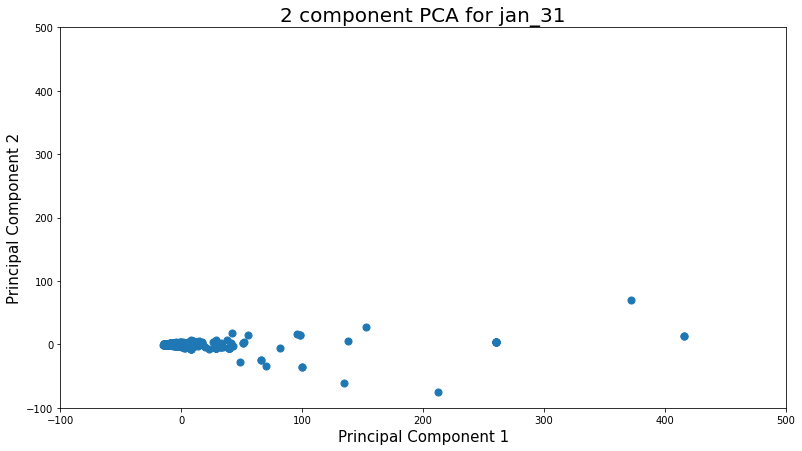

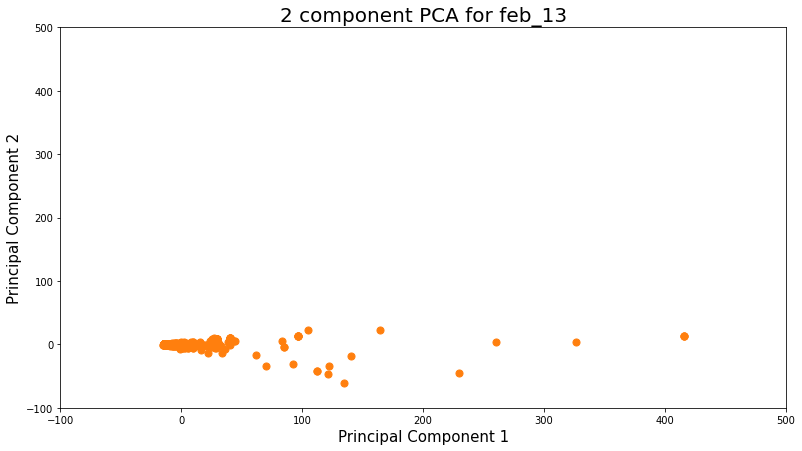

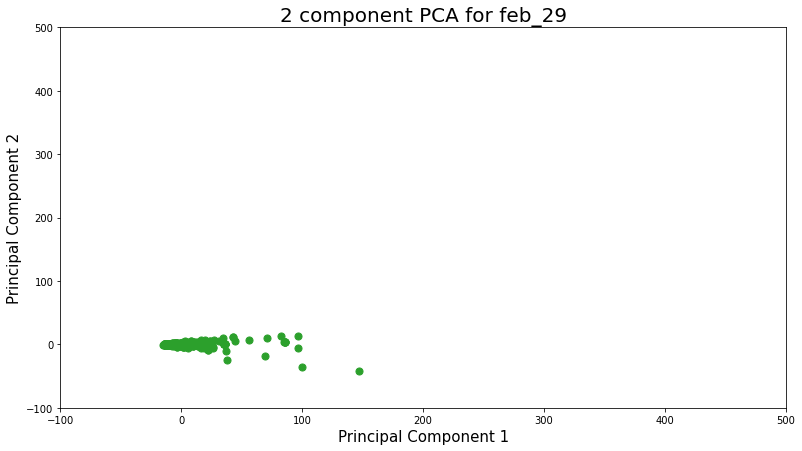

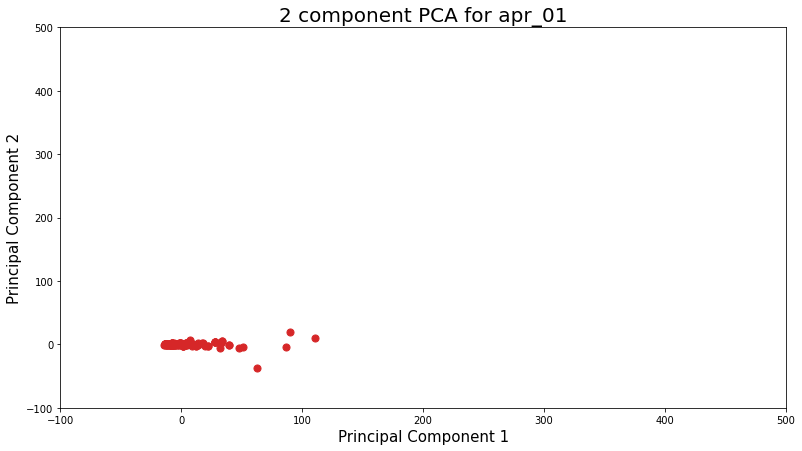

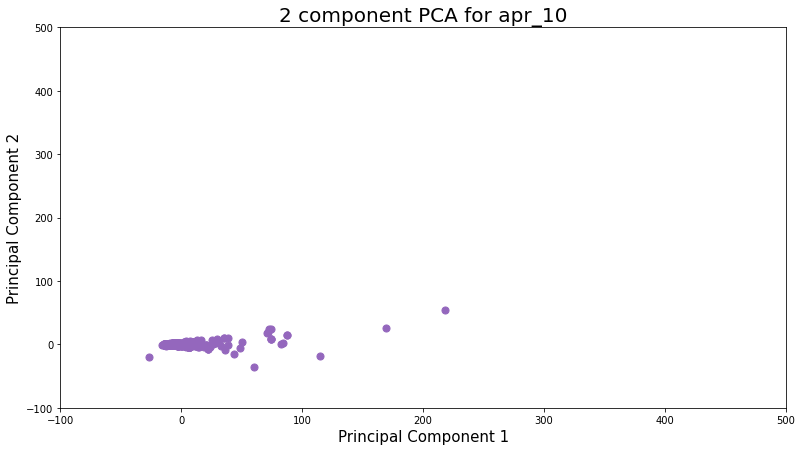

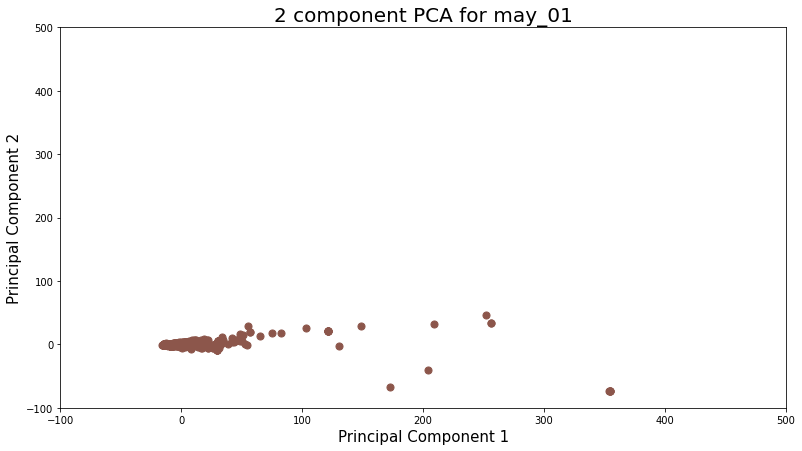

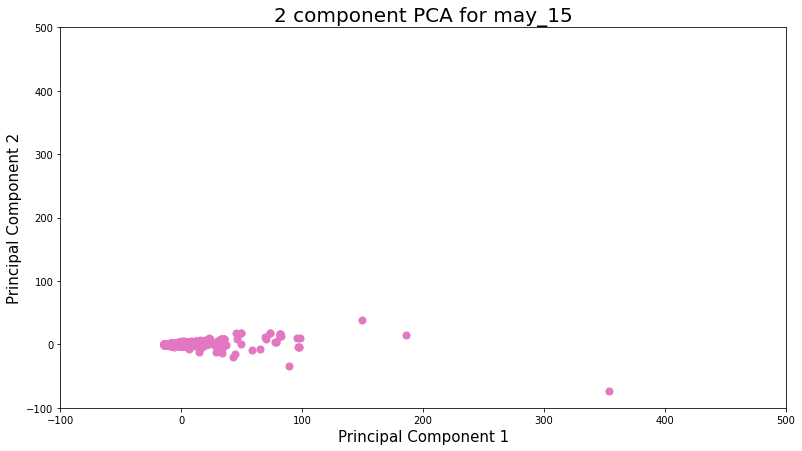

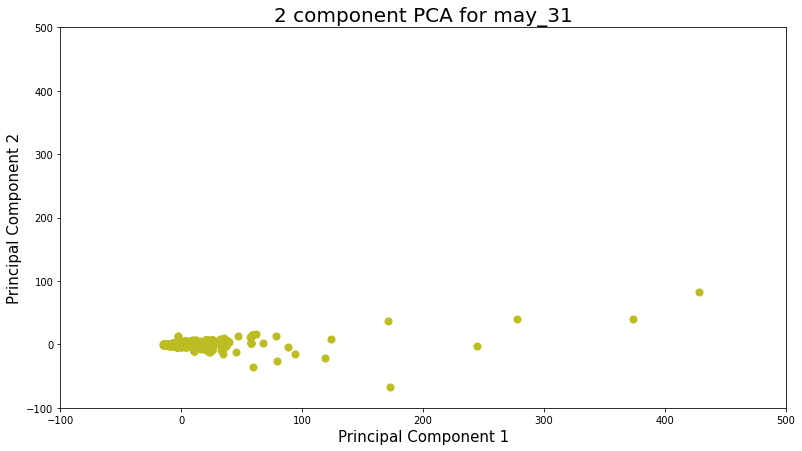

In [19]:




targets = pca_df_no_outliers['week_month_year'].unique().tolist()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan'] # 'tab:olive', 
dates = ['jan_31', 'feb_13', 'feb_29', 'apr_01', 'apr_10', 'may_01', 'may_15', 'may_31']
for target, color, date in zip(targets, colors, dates):
    indicesToKeep = pca_df_no_outliers['week_month_year'] == target
    plt.figure(figsize=(13,7))
    plt.scatter(pca_df_no_outliers.loc[indicesToKeep, 'principal component 1'], 
               pca_df_no_outliers.loc[indicesToKeep, 'principal component 2'], 
               c = color, 
               s = 50)
    
    plt.xlabel('Principal Component 1', fontsize = 15)
    plt.ylabel('Principal Component 2', fontsize = 15)
    plt.title('2 component PCA for ' + date, fontsize = 20)
        
    plt.xlim(-100, 500)
    plt.ylim(-100, 500)
    
#     plt.figure(figsize=(13,7))
    plt.show()
    
